In [52]:
import numpy as np

input = np.array([0.3,-0.1])
weight = np.array([1,1])
bais= -0.7
maal = input * weight
totaal = 0
for getal in maal:
    totaal += getal
totaal+=bais
print(totaal)

-0.5


In [53]:

import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import math
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [54]:
data = pd.read_csv('../../oefeningen/DataSets/The Simpsons original.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         9 non-null      object
 1   hair length  9 non-null      int64 
 2   weight       9 non-null      int64 
 3   age          9 non-null      int64 
 4   gender       9 non-null      object
dtypes: int64(3), object(2)
memory usage: 492.0+ bytes


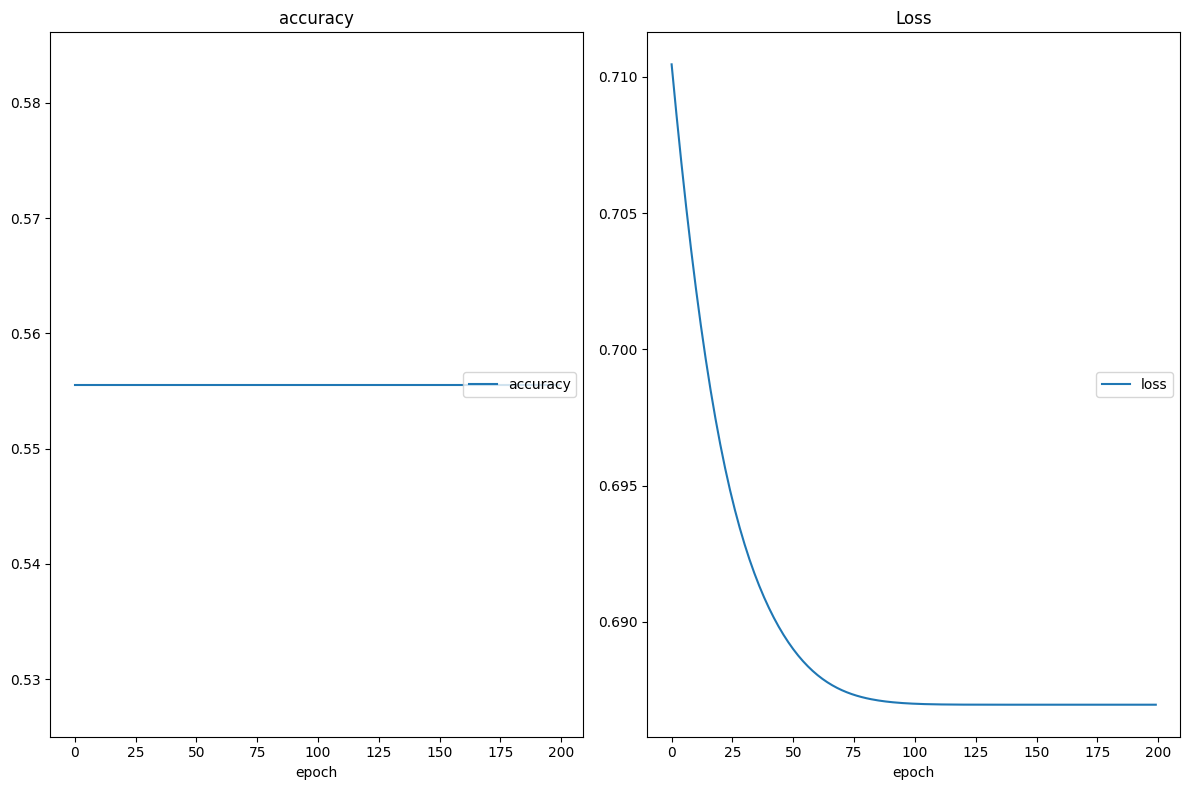

accuracy
	accuracy         	 (min:    0.556, max:    0.556, cur:    0.556)
Loss
	loss             	 (min:    0.687, max:    0.710, cur:    0.687)


In [55]:
scale = MinMaxScaler()
x_simps= data[['hair length','weight','age']]
y_simps = data[['gender']]
y_simps = y_simps.replace(to_replace=['M','F'], value=[0,1])
y_simps= to_categorical(y_simps)
x_simps_norm = scale.fit_transform(X=x_simps)
inputs_simpons = Input(shape=(3,))
x_simp = Dense(6, activation='sigmoid')(inputs_simpons)  
x_simp = Dense(12, activation='sigmoid')(x_simp)  
x_simp = Dense(24, activation='sigmoid')(x_simp)
x_simp = Dense(12, activation='sigmoid')(x_simp)
x_simp = Dense(6, activation='sigmoid')(x_simp) 
outputs_xor = Dense(2, activation='sigmoid')(x_simp)
model_xor = Model(inputs_simpons, outputs_xor, name='XOR_NN')

model_xor.summary()
plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)

model_xor.compile(optimizer=Adam(learning_rate=0.001),
                  loss=keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
history_xor = model_xor.fit(x_simps, 
                            y_simps, epochs=200, 
                            callbacks=[PlotLossesKeras()], 
                            verbose=False
                           )

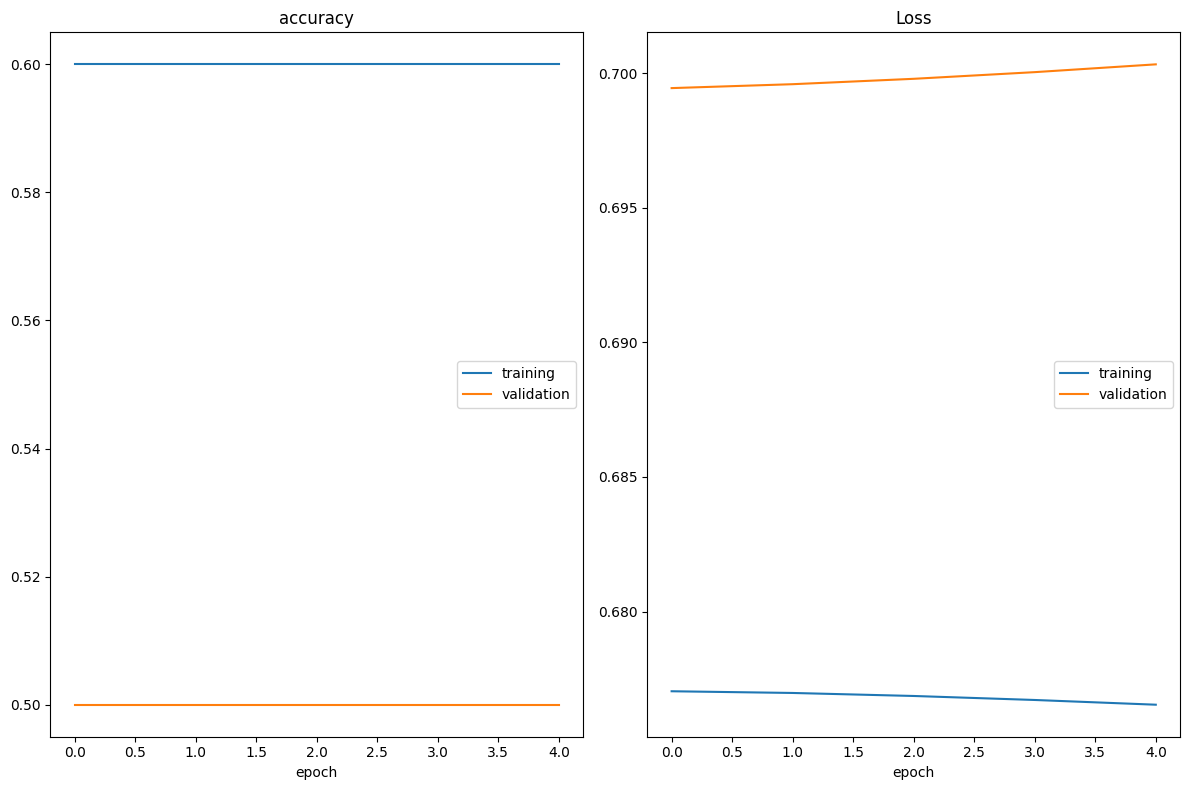

accuracy
	training         	 (min:    0.600, max:    0.600, cur:    0.600)
	validation       	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	training         	 (min:    0.677, max:    0.677, cur:    0.677)
	validation       	 (min:    0.699, max:    0.700, cur:    0.700)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.6000 - loss: 0.6765 - val_accuracy: 0.5000 - val_loss: 0.7003


In [56]:
from sklearn.model_selection import train_test_split
x_train_cer,x_test_cer,y_train_cer,y_test_cer=train_test_split(x_simps,y_simps,test_size=0.2) #0.2 = 20%

history = model_xor.fit(
    x_train_cer, # training data
    y_train_cer, # training targets
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()])

In [57]:
df_comic= pd.DataFrame({'hair length': [8.],'weight': [500.], 'age': [38.]})
df_comic_norm = scale.transform(df_comic)
model_xor.predict(df_comic_norm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.561618 , 0.4422335]], dtype=float32)

In [60]:
data2 = pd.read_csv('../../oefeningen/DataSets/iris.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
